<a href="https://colab.research.google.com/github/mertcanik/Spotify-EDA/blob/main/SpotifyFeatures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Libraries#

import numpy as np
import pandas as pd
from sklearn import datasets
import os
import re
from os import path
from PIL import Image
import datetime

In [ ]:
# Data Visualization Libraries#

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
df = pd.read_csv('SpotifyFeatures.csv')
df.sample(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
20201,Dance,Gossip,Heavy Cross,428Dl0NOBojmUS98R2pDHr,58,0.0790,0.793,242773,0.688,0.060400,D,0.1450,-4.216,Major,0.0328,120.058,4-Apr,0.221
153413,Rock,Alice Cooper,I'm Eighteen,3YU9X8ryOR20beT7wOlDIJ,56,0.2490,0.618,180760,0.413,0.051700,E,0.1310,-14.164,Minor,0.0302,97.840,4-Apr,0.531
22004,Dance,Britney Spears,Get Naked (I Got a Plan),0PGxTaUcMggyJxTyLy0uOx,53,0.0642,0.734,285080,0.856,0.000475,F#,0.0442,-4.592,Minor,0.0560,115.027,4-Apr,0.670
232367,Soul,Paolo Nutini,No Other Way,1KuNsc2Q2URrA9Xb1XnfLJ,40,0.7250,0.400,265640,0.391,0.000000,D,0.0884,-7.924,Major,0.0666,164.544,4-Mar,0.446
196425,Movie,Michel Roux,"Votre toast, je peux vous le rendre (Carmen)",3zXzBm9Hj306L3QCaJfkUy,0,0.9870,0.389,376067,0.387,0.000257,F,0.1390,-10.464,Minor,0.1770,60.397,4-Mar,0.335


In [ ]:
df.shape

(232725, 18)

In [ ]:
#checking the dataset

df= df['genre'].value_counts()
df

Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: genre, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.series.Series'>
Index: 27 entries, Comedy to A Capella
Series name: genre
Non-Null Count  Dtype
--------------  -----
27 non-null     int64
dtypes: int64(1)
memory usage: 1.5+ KB


In [ ]:
df.isnull().sum()

0

In [ ]:
df.duplicated().sum()

0

In [ ]:
categorical_df = df.select_dtypes(include = "object")

categorical_df.info()

AttributeError: ignored

In [ ]:
for col in categorical_df.columns:
    print(f'{col}: {categorical_df[col].nunique()}')
    print('\n')

genre: 27


artist_name: 14564


track_name: 148608


track_id: 176774


key: 12


mode: 2


time_signature: 5




In [ ]:
df['genre'].value_counts()

Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: genre, dtype: int64

In [ ]:
#punctuation correction of "Children's Music" Genre

df["genre"] = df["genre"].replace("Children’s Music", "Children's Music")
df.sample(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
204336,Soundtrack,Trevor Jones,The Power Ceremony,4n9qGFXIkDRKQR8ak9K1YZ,27,0.187000,0.0732,232778,0.282,0.857000,F,0.1180,-16.937,Major,0.0412,74.752,4-Mar,0.0374
171202,Comedy,Steve Hofstetter,The Street is Half Full,106KG4TSa3hzV2RvlGOZcL,21,0.748000,0.5810,295375,0.465,0.000000,F,0.7760,-19.352,Major,0.9390,73.762,4-Mar,0.3090
166014,Reggaeton,Alexis y Fido,Perro Caliente,2Uuorg2GvqDBxm2LotSzWo,16,0.086800,0.8850,164480,0.771,0.003460,G#,0.0505,-5.925,Major,0.1350,90.010,4-Apr,0.6740
51834,Blues,The Band,It Makes No Difference - Concert Version,0jo6RYrOvzGSjtmgf7EEIg,36,0.016900,0.4470,411200,0.857,0.017900,A#,0.9850,-6.338,Major,0.0420,125.452,4-Apr,0.5820
119587,Rap,Breaking Benjamin,Down,1RlTQfw5fy7evQZSM6MuaA,57,0.000162,0.5050,242653,0.947,0.000001,G#,0.1000,-3.498,Major,0.0944,120.023,4-Mar,0.2300


In [ ]:
df['genre'].value_counts()

Children's Music    14756
Comedy               9681
Soundtrack           9646
Indie                9543
Jazz                 9441
Pop                  9386
Electronic           9377
Folk                 9299
Hip-Hop              9295
Rock                 9272
Alternative          9263
Classical            9256
Rap                  9232
World                9096
Soul                 9089
Blues                9023
R&B                  8992
Anime                8936
Reggaeton            8927
Ska                  8874
Reggae               8771
Dance                8701
Country              8664
Opera                8280
Movie                7806
A Capella             119
Name: genre, dtype: int64

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,232725.0,41.127502,18.189948,0.00000,29.0000,43.000000,55.0000,100.000
acousticness,232725.0,0.368560,0.354768,0.00000,0.0376,0.232000,0.7220,0.996
danceability,232725.0,0.554364,0.185608,0.05690,0.4350,0.571000,0.6920,0.989
duration_ms,232725.0,235122.339306,118935.909299,15387.00000,182857.0000,220427.000000,265768.0000,5552917.000
energy,232725.0,0.570958,0.263456,0.00002,0.3850,0.605000,0.7870,0.999
instrumentalness,232725.0,0.148301,0.302768,0.00000,0.0000,0.000044,0.0358,0.999
liveness,232725.0,0.215009,0.198273,0.00967,0.0974,0.128000,0.2640,1.000
loudness,232725.0,-9.569885,5.998204,-52.45700,-11.7710,-7.762000,-5.5010,3.744
speechiness,232725.0,0.120765,0.185518,0.02220,0.0367,0.050100,0.1050,0.967
tempo,232725.0,117.666585,30.898907,30.37900,92.9590,115.778000,139.0540,242.903


In [ ]:
# Grouping data by genre then count track_id in each group
df_1 = pd.DataFrame(df.groupby(df["genre"]).count()["track_id"]).reset_index()
#sorting values in
df_1 = df_1.sort_values(by="track_id",ascending=False)

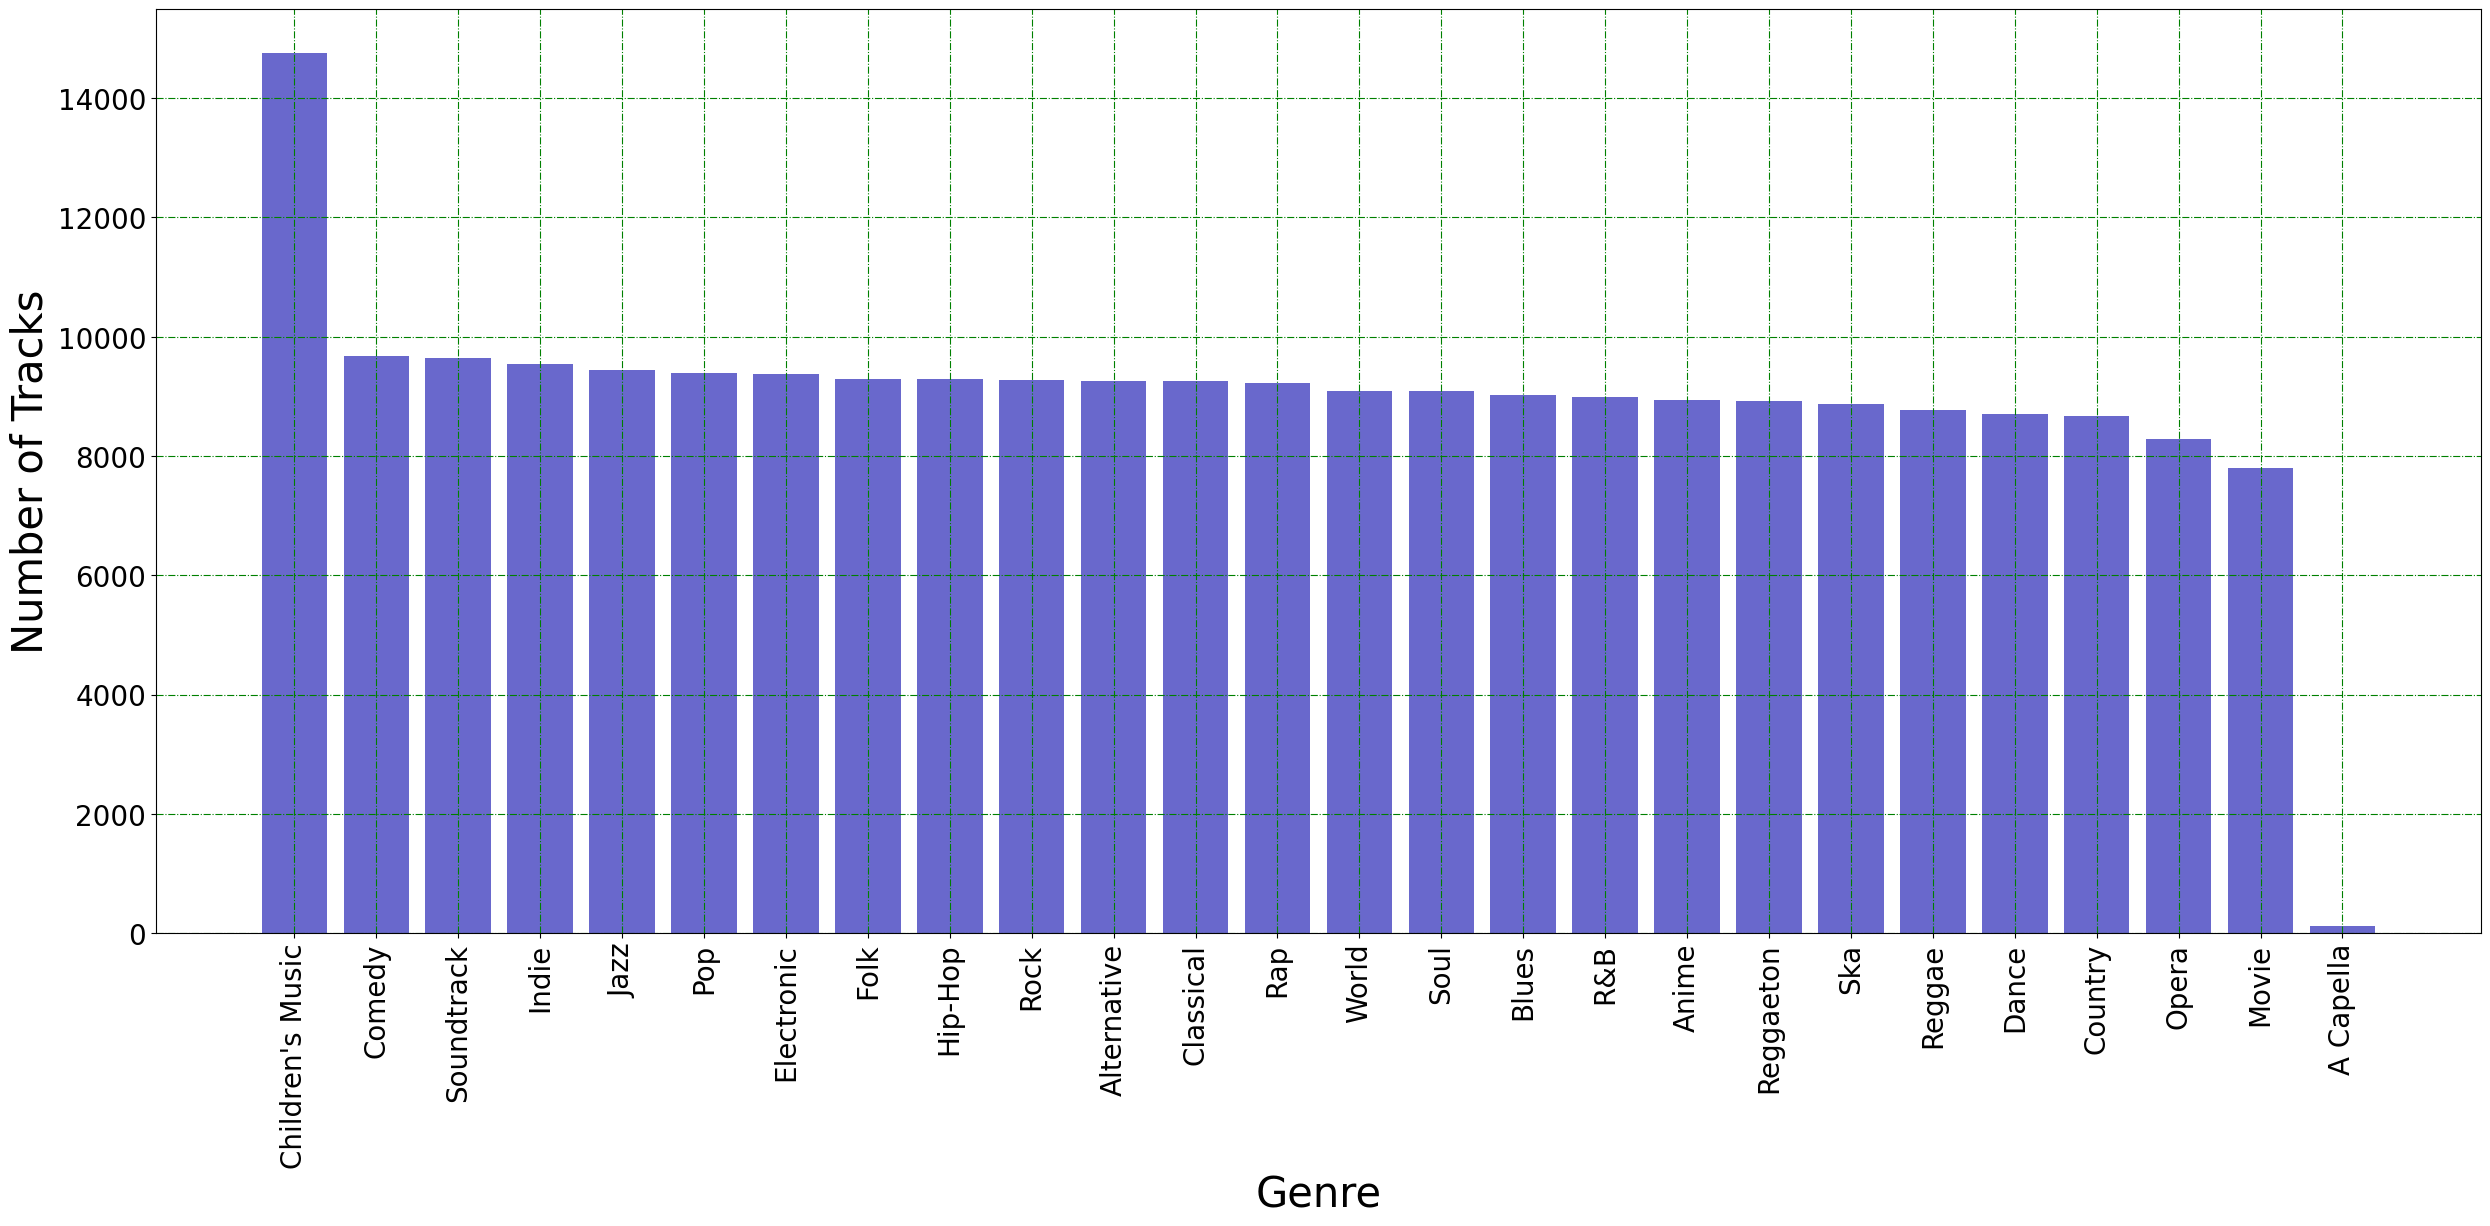

In [ ]:
# Plotting number of tracks in each category
plt.figure(figsize= (30,12))
plt.bar(df_1["genre"],df_1["track_id"],palette="",alpha = 0.6)
plt.bar[0].set_color('darkred')
plt.xlabel("Genre",size = 30)
plt.ylabel("Number of Tracks",size = 30)
plt.xticks(size = 20,rotation='vertical')
plt.yticks(size = 20)
plt.grid(linestyle = '-.',c = "g")
plt.show()

In [ ]:
popular_genres=df[['genre', 'popularity']].sort_values(by="popularity",ascending=False)
popular_genres=popular_genres.drop_duplicates(subset = "popularity")
#popular_genres.sort_values('popularity').tail(5)
popular_genres.head(5)

,genre,popularity
107804,Pop,100
107803,Pop,99
107909,Pop,98
107875,Pop,97
9048,Dance,96


In [ ]:
#average popularity scores for each genre
df_14 = pd.DataFrame(df.groupby(df["genre"]).mean(numeric_only=True)["popularity"]).reset_index()
df_14= df_14.sort_values(by = "popularity", ascending=True)
df_14.head(5)

,genre,popularity
0,A Capella,9.302521
14,Movie,12.174097
15,Opera,13.335628
6,Comedy,21.342630
2,Anime,24.258729


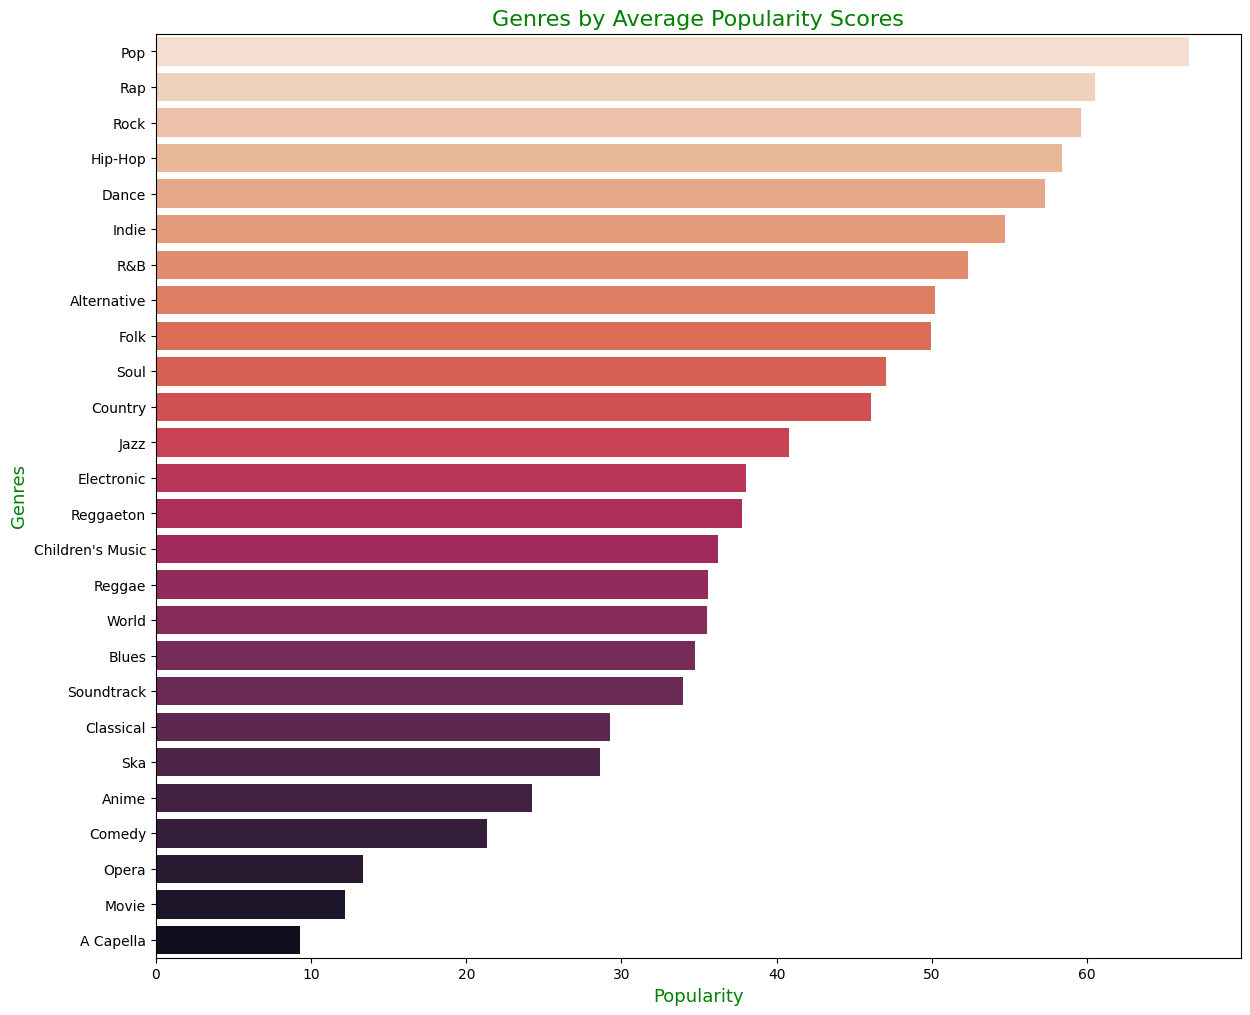

In [ ]:
# visualization of mean values for each genre
#from wordcloud import WordCloud
plt.figure(figsize = (14, 12))
sns.barplot(data=df_14, x='popularity', y="genre", palette = 'rocket_r', errorbar="sd", order = df_14.sort_values('popularity',ascending=False).genre)
plt.xlabel("Popularity", size=13, color="g")
plt.ylabel("Genres", size=13, color="g")
plt.title("Genres by Average Popularity Scores", size=16, color="g")
plt.show()